In [2]:
import pandas as pd
import geopandas as gpd
import fiona
from shapely.geometry import Point
import os

In [3]:
## Se usará el paquete de fiona para poder pasar los archivos SHP a KML
fiona.supported_drivers['KML'] = 'rw'

In [4]:
enp = gpd.read_file("../../data/enps_canarias/eennpp.shp")
bandama_grid = gpd.read_file("../../results/C-14.kml", driver = "kml")
especies_tsv = pd.read_csv("../data/coord_plantae.tsv", sep = "\t")

In [5]:
bandama = enp[enp["nombre"] == "Bandama"]
bandama = bandama.to_crs(epsg=4326) 

In [6]:
geometry = [Point(xy) for xy in zip(especies_tsv['longitude'], especies_tsv['latitude'])]
puntos_especie = gpd.GeoDataFrame(especies_tsv, geometry=geometry)
puntos_especie = puntos_especie.set_crs(epsg=4326, inplace=True)

In [7]:
gdf_especies = puntos_especie[puntos_especie["category"] == "Especie nativa"]
gdf_especies_nativa = gdf_especies[gdf_especies["category"] == "Especie nativa"]

In [8]:
#bandama_grid = 
bandama_grid["cuadricula"] = range(len(bandama_grid) )

In [9]:
#bandama_especies = 
bandama_species_cuadriculas = gpd.sjoin(bandama_grid, puntos_especie, how="left", predicate="contains").dropna(subset=['index_right'])

In [12]:
ban_esp_cua_n = gpd.GeoDataFrame(
  (bandama_species_cuadriculas[["specie", "cuadricula", "geometry"]].
    groupby(["specie", "cuadricula", "geometry"]).
    size().
    reset_index(name="n")
  ), 
  geometry="geometry")

<Axes: >

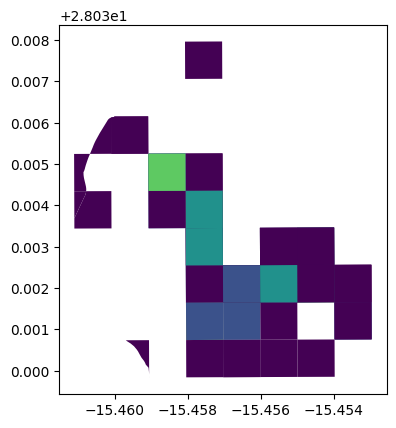

In [16]:
ban_esp_cua_n.plot(column="n")

In [17]:
ban_esp_cua_n.to_file("../data/bandama_especies.shp")